# Task1 :  TITANIC SURVIVAL PREDICTION 

  

**Background:**
- Analyzing the Titanic dataset to predict passenger survival.
- A classic dataset representing the historical Titanic disaster.

**Approach:**
1. **Data Exploration:**
   - Understand dataset structure and handle missing values.
2. **Data Visualization:**
   - Visualize survival distribution and explore feature relationships.
3. **Data Preprocessing:**
   - Encode categorical variables, handle missing values.
   - Potentially create new features.
4. **Model Building:**
   - Train Logistic Regression, Random Forest, and Decision Tree models.
   - Evaluate models using accuracy, precision, recall, and F1-score.
5. **Fine-Tuning:**
   - Optimize models through hyperparameter tuning.
6. **Documentation:**
   - Create README with insights and code structure.

**Benefits:**
- Gain insights into survival factors.
- Develop hands-on experience in data preprocessing and model building.
- Showcase model evaluation skills on GitHub.
- Compare different models for classification tasks.

# Import necessary libraries


In [1]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix ,precision_score ,recall_score
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier


# 1. Data Gathering:
The Titanic dataset used for the Titanic Survival Prediction task is a curated collection of information about passengers who were aboard the Titanic during its ill-fated maiden voyage. The data is often used in data science and machine learning projects as a classic example for predictive modeling.

In [2]:
data = pd.read_csv("./Dataset/tested.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [3]:
## Check the size
data.shape

(418, 12)

In [4]:
## Basic info on data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


The dataset contains a mix of numerical and categorical data

In [5]:
## Check basic statistic
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
## Check basic statistic
data.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


# 2. Data Cleaning 
    In the Data Cleaning  step, the dataset undergoes essential operations:

1. **Removing Duplicates:**
   Identical entries are eliminated, ensuring each data point is unique.

2. **Removing NaN Rows and Columns:**
   Rows and columns with missing values are deleted, ensuring data integrity.


In [7]:
## Check for Duplicates and Remove them
data.duplicated().sum() ## Will give us a number of duplicates


0

In [8]:
## Check for nan values

data.isna().sum()  # Will check for any duplicates


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
# Fill missing 'Age' values with the median
data['Age'].fillna(data['Age'].median(), inplace=True)


In [10]:
# Fill missing 'Fare' value with the median
data['Fare'].fillna(data['Fare'].median(), inplace=True)


In [11]:
# Drop unnecessary columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket']
data.drop(columns=columns_to_drop, inplace=True)


In [12]:
## Check for nan values

data.isna().sum()  # Will check for any duplicates


Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       327
Embarked      0
dtype: int64

In [13]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,0,3,male,27.0,0,0,8.0500,NaN,S
414,1,1,female,39.0,0,0,108.9000,C105,C
415,0,3,male,38.5,0,0,7.2500,NaN,S
416,0,3,male,27.0,0,0,8.0500,NaN,S


In [14]:
data["Survived"].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [15]:
data.shape

(418, 9)

# 3. Data Visualization and Exploration
    In this step, we'll analyze the dataset using histograms and bar charts to understand numerical and categorical distributions.

## 1. Survived vs. Not Survived:

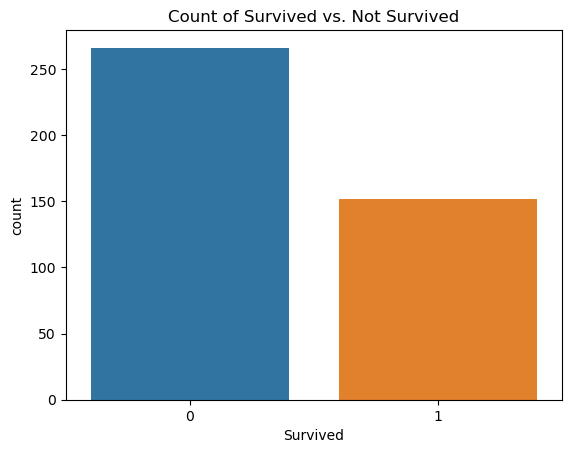

In [16]:
sns.countplot(x='Survived', data=data)
plt.title('Count of Survived vs. Not Survived')
plt.show()


## 2. Distribution of Passengers in Each Pclass:

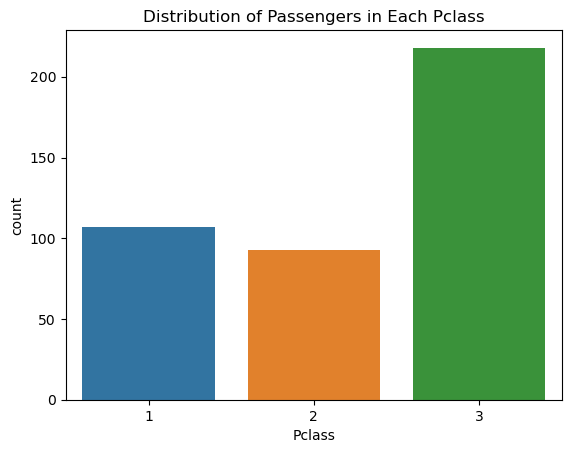

In [17]:
sns.countplot(x='Pclass', data=data)
plt.title('Distribution of Passengers in Each Pclass')
plt.show()


## 3.Distribution of Age:

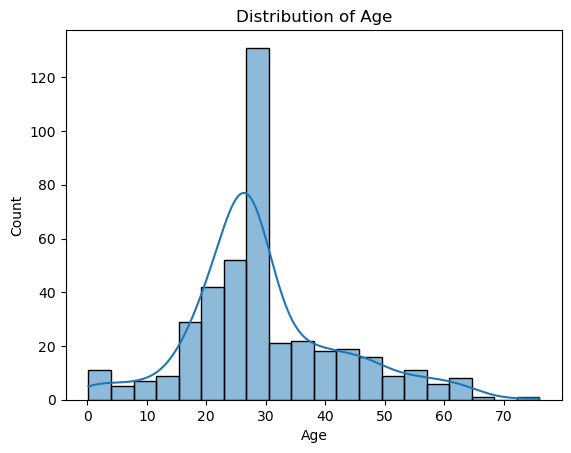

In [18]:
sns.histplot(x='Age', data=data, bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()


## 4. Count of Passengers by Sex:

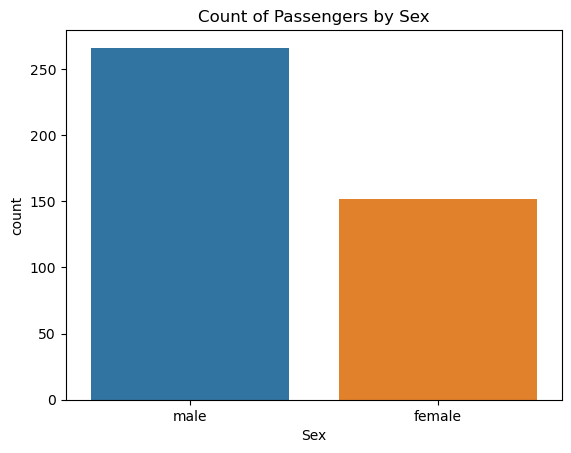

In [19]:
sns.countplot(x='Sex', data=data)
plt.title('Count of Passengers by Sex')
plt.show()


## 5. Distribution of Siblings/Spouses (SibSp):

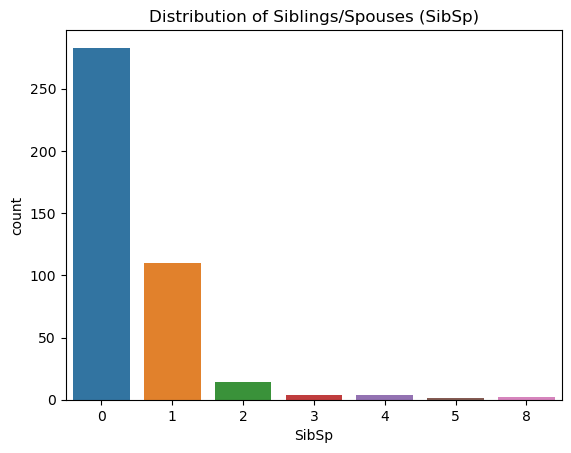

In [20]:
sns.countplot(x='SibSp', data=data)
plt.title('Distribution of Siblings/Spouses (SibSp)')
plt.show()


## 6. Distribution of Parents/Children (Parch):

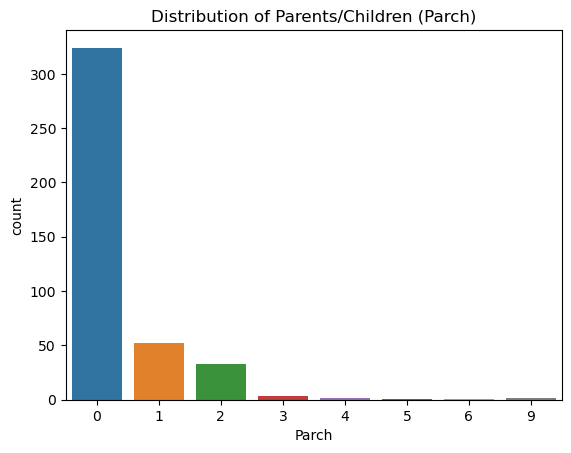

In [21]:
sns.countplot(x='Parch', data=data)
plt.title('Distribution of Parents/Children (Parch)')
plt.show()


## 7. Fare Distribution:

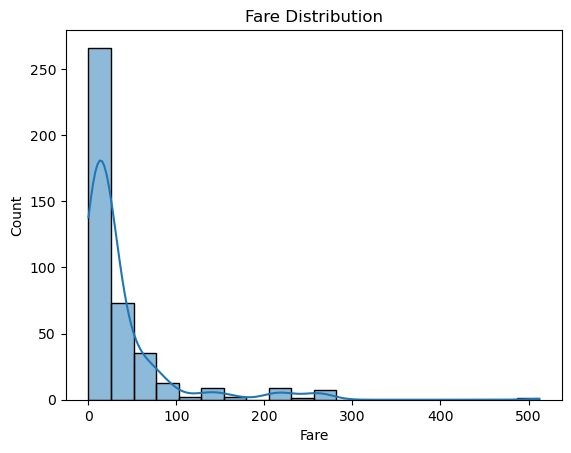

In [22]:
sns.histplot(x='Fare', data=data, bins=20, kde=True)
plt.title('Fare Distribution')
plt.show()


## 8. Count of Embarked Locations:

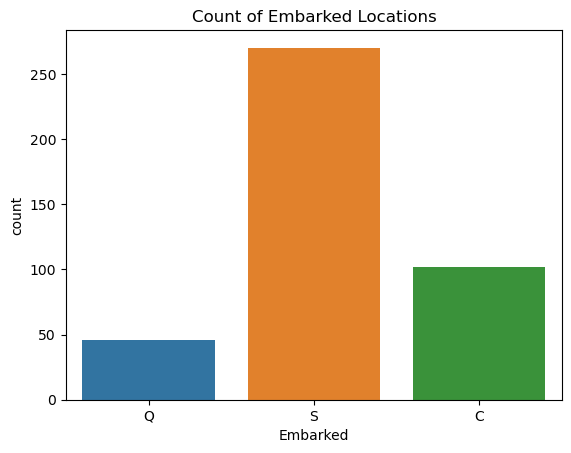

In [23]:
sns.countplot(x='Embarked', data=data)
plt.title('Count of Embarked Locations')
plt.show()


## 9. Survival Count by Pclass:

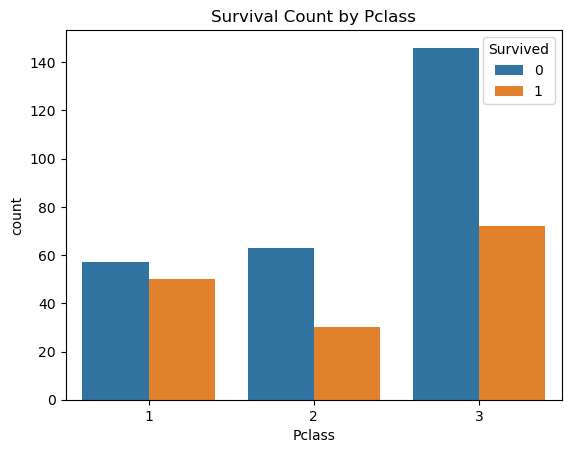

In [24]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Count by Pclass')
plt.show()


## 10. Survived Analysis:

C:\Users\User\AppData\Local\Temp\ipykernel_2204\4249166669.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


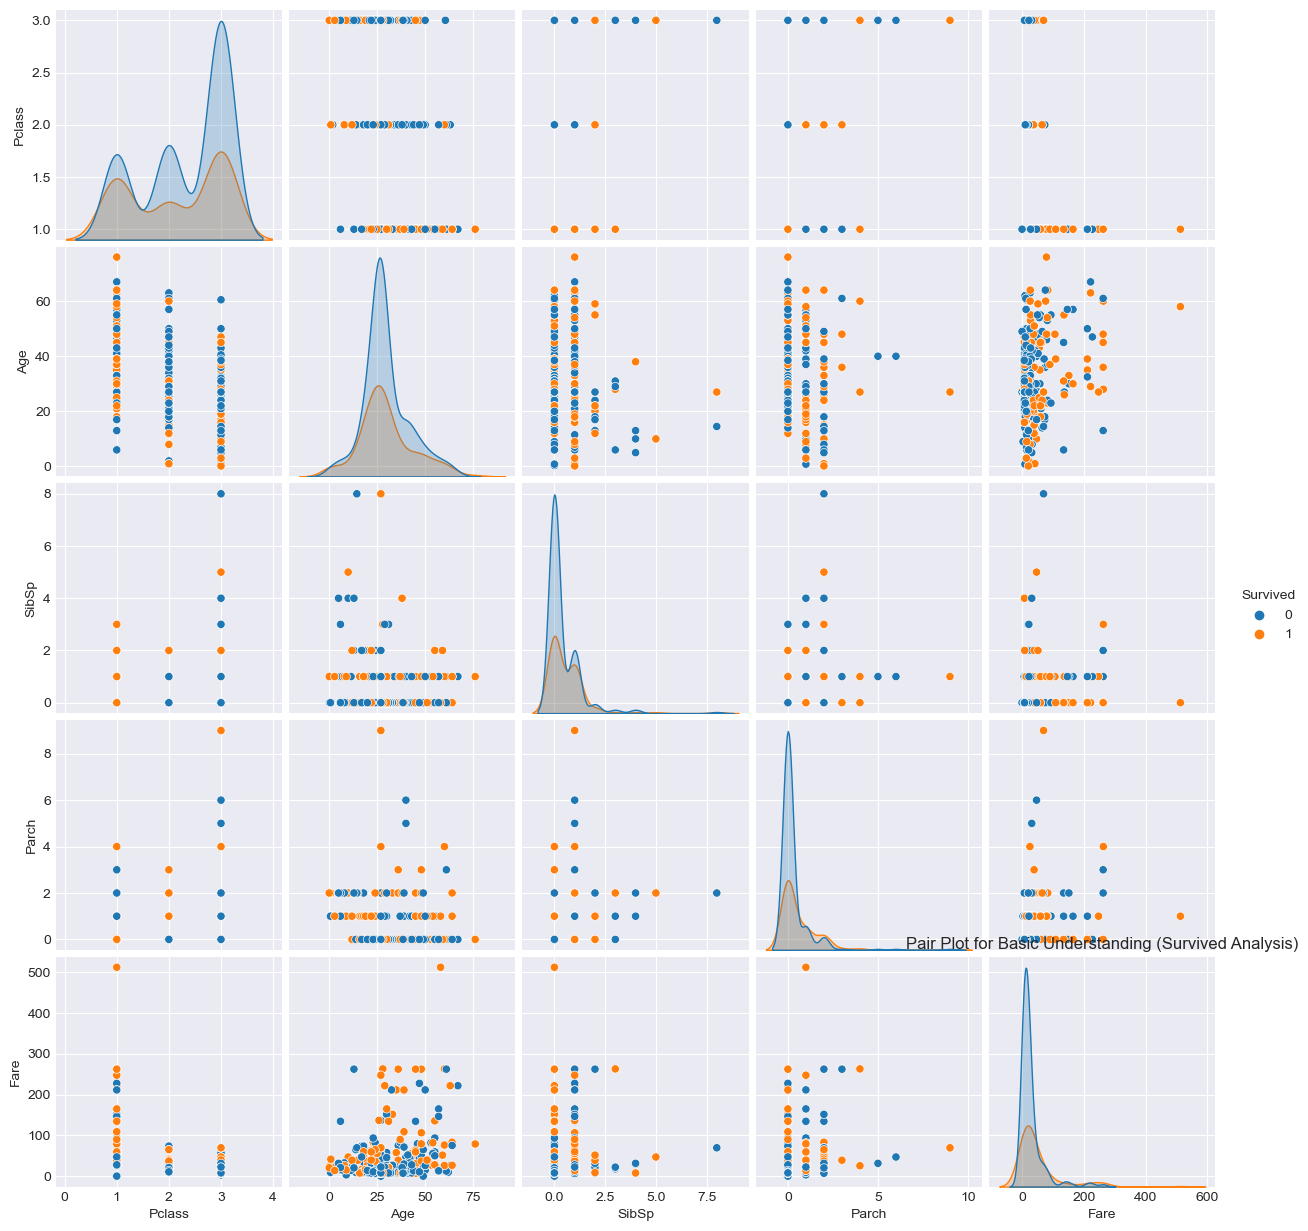

In [25]:
# Visualization: Pair Plot for Basic Understanding
plt.style.use("seaborn-darkgrid")
sns.pairplot(data, hue="Survived")
plt.title('Pair Plot for Basic Understanding (Survived Analysis)')
plt.show()


# 4. Data Preprocessing

In [26]:
# Initialize the encoder with handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

categorical = ["Sex","Embarked"]
numeric = ["Pclass","Age","SibSp","Parch","Fare"]

transformer = ColumnTransformer([("cat",encoder,categorical),
                              ("num",scaler, numeric)])
x = data.drop("Survived" ,axis = 1)
y = data["Survived"]

transform = transformer.fit_transform(x)

print("transform shape :",transform.shape)
print("y shape :",y.shape)

transform shape : (418, 10)
y shape : (418,)


In [27]:
## Split the data to train test

x_train ,x_test ,y_train ,y_test = train_test_split (transform ,y ,test_size = 0.2 ,random_state = 42)

In [28]:
x_train.shape

(334, 10)

In [29]:
x_test.shape

(84, 10)

In [30]:
y_train.shape

(334,)

In [31]:
y_test.shape

(84,)

# 5.  Model Selection and Fine-Tuning or Evaluation

1. **Model Options:**
   - Consider Logistic Regression, Random Forest, and Gradient Boosting.

2. **Data Splitting:**
   - Divide the dataset into training and testing sets (e.g., 80-20 split).

3. **Training:**
   - Train models with default parameters on the training data.

4. **Evaluation:**
   - Use metrics like accuracy, precision, recall, and F1-score for evaluation.
   - Apply cross-validation techniques for robust assessment.

5. **Hyperparameter Tuning:**
   - Fine-tune Random Forest and Gradient Boosting using grid/random search.

6. **Comparison:**
   - Compare models based on evaluation metrics.

7. **Deployment and Monitoring:**
   - Deploy the best-performing model and establish continuous monitoring for accuracy and relevance. Update the model as needed based on changing data patterns.

In [32]:
class_names = [0, 1]
print(class_names)


[0, 1]


In [33]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S
5,0,3,male,14.0,0,0,9.2250,NaN,S
6,1,3,female,30.0,0,0,7.6292,NaN,Q
7,0,2,male,26.0,1,1,29.0000,NaN,S
8,1,3,female,18.0,0,0,7.2292,NaN,C
9,0,3,male,21.0,2,0,24.1500,NaN,S


### GradientBoostingClassifier

In [34]:

mnb = GradientBoostingClassifier()
mnb.fit(x_train, y_train)

# Evaluate the model
train_accuracy = mnb.score(x_train, y_train)
test_accuracy = mnb.score(x_test, y_test)

# Print model accuracy
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions and display classification report
y_pred = mnb.predict(x_test)
class_report = classification_report(y_test, y_pred)

print("Classification Report:\n", class_report)




Training Accuracy: 1.00
Test Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



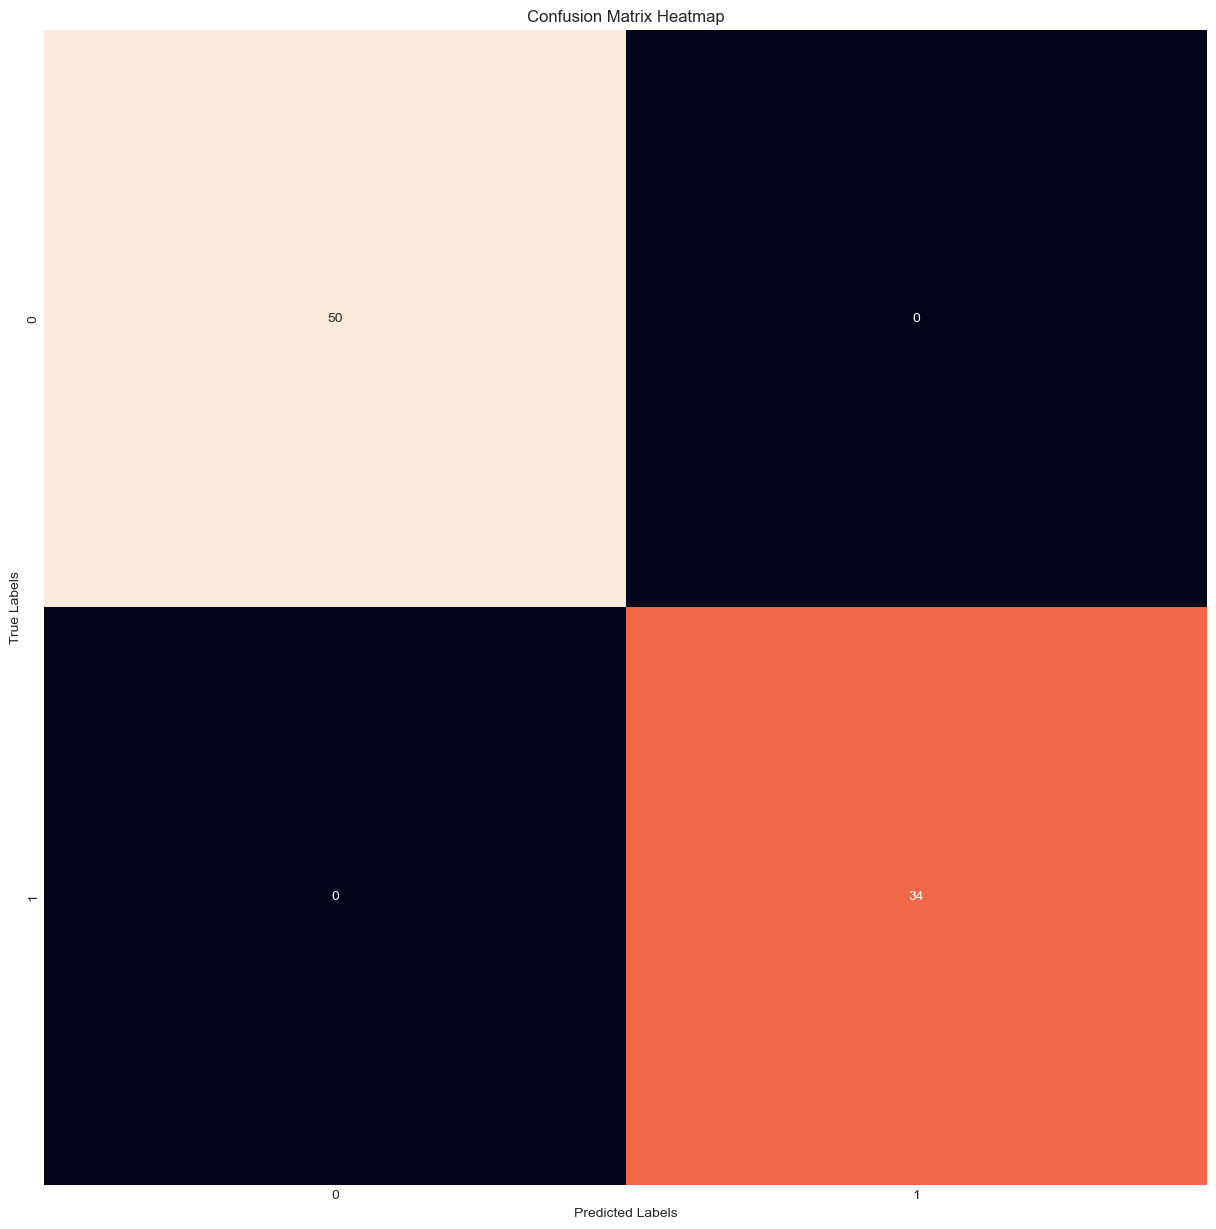

In [35]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### LogisticRegression

In [36]:

model = LogisticRegression()
model.fit(x_train ,y_train)
print("Model Score on Training data",model.score(x_train ,y_train))
print("Model Score on Testing data",model.score(x_test ,y_test))
y_pred = model.predict(x_test)
print(classification_report(y_pred ,y_test))



Model Score on Training data 1.0
Model Score on Testing data 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



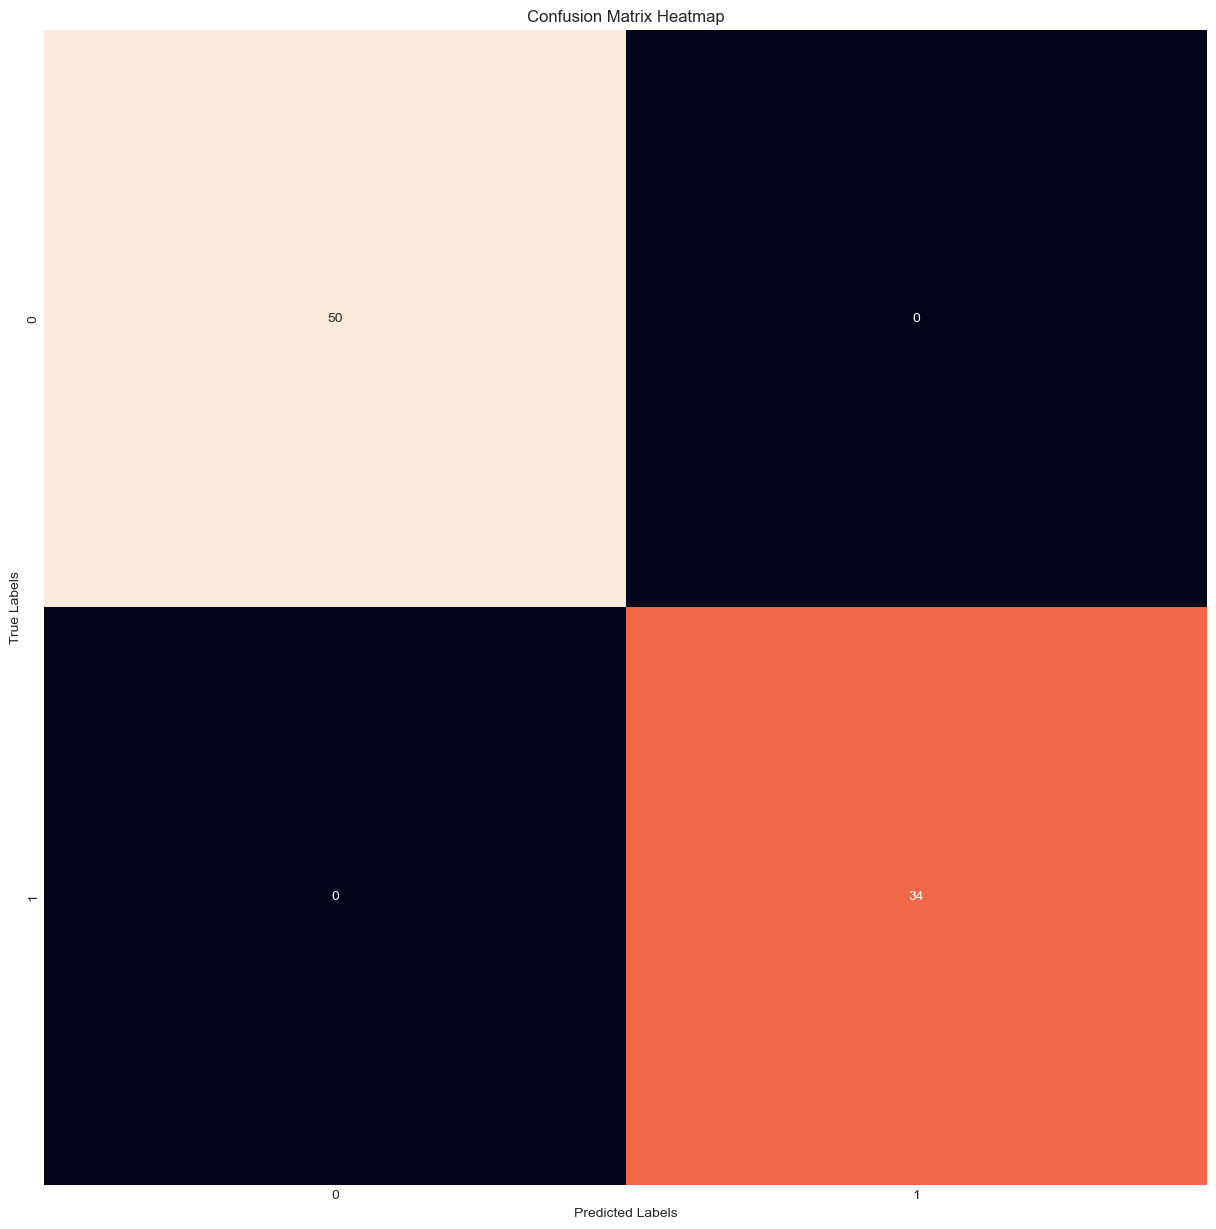

In [37]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Support Vector Machine ( SVC )

In [38]:


svm = LinearSVC()
svm.fit(x_train ,y_train)
print("Model Score on Training data",svm.score(x_train ,y_train))
print("Model Score on Testing data",svm.score(x_test ,y_test))
y_pred = svm.predict(x_test)
print(classification_report(y_pred ,y_test))




Model Score on Training data 1.0
Model Score on Testing data 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



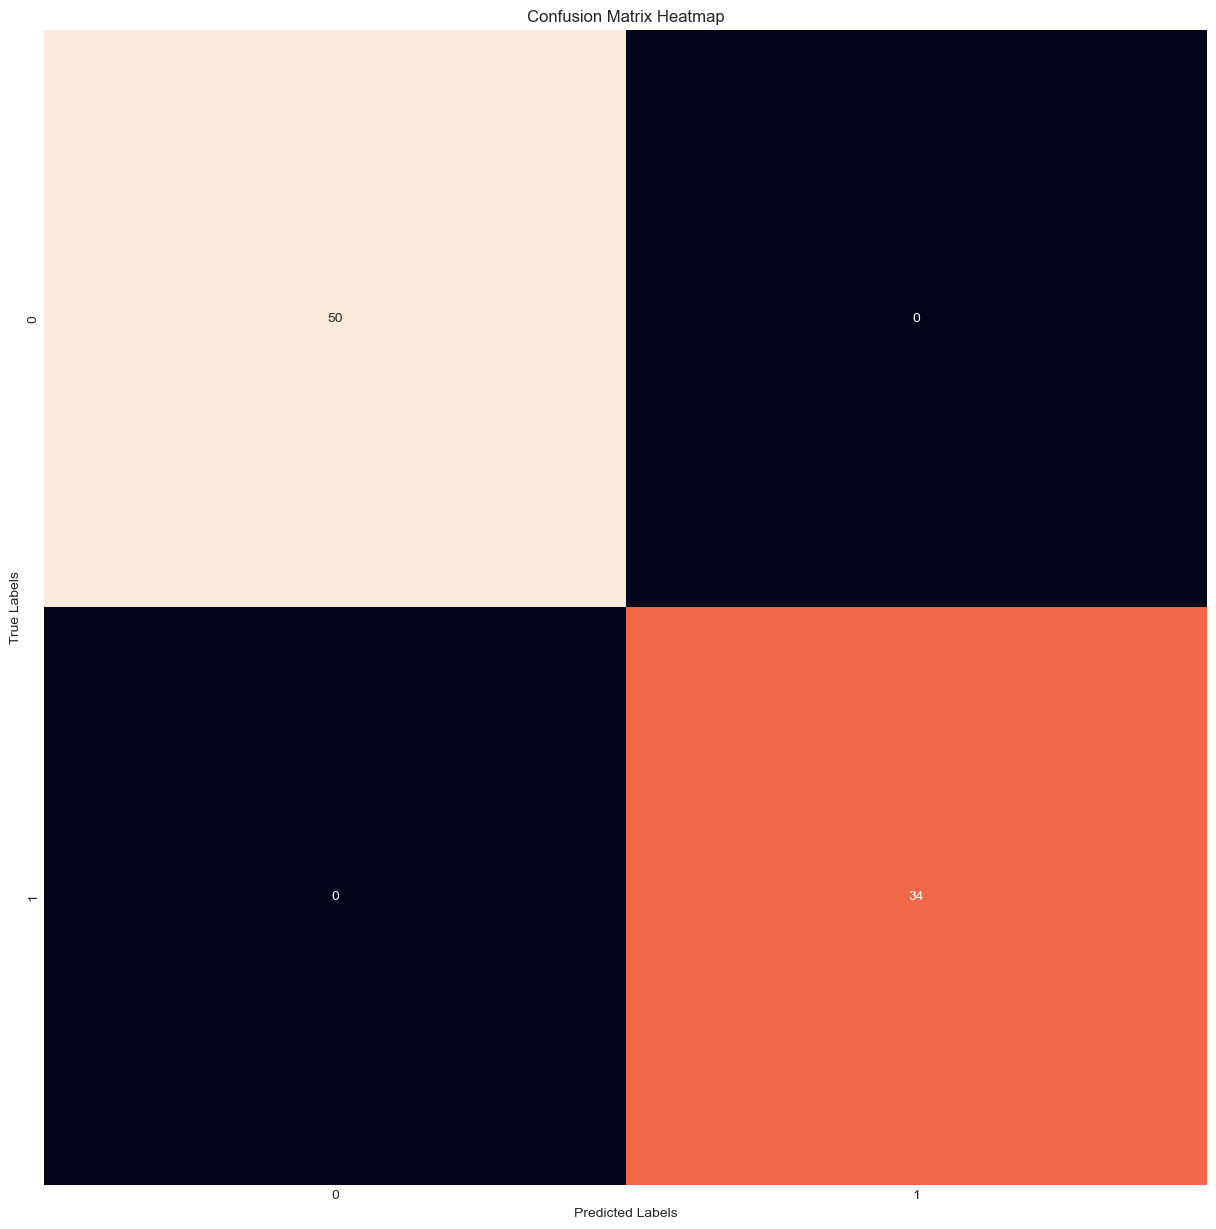

In [39]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### RandomForestClassifier

In [40]:
# Create a Random Forest model
random_forest = RandomForestClassifier()

random_forest.fit(x_train, y_train)
print("Random Forest - Train Score:",random_forest.score(x_train, y_train))
print("Random Forest - Test Score:", random_forest.score(x_test, y_test))

y_pred = random_forest.predict(x_test)
print(classification_report(y_pred ,y_test))




Random Forest - Train Score: 1.0
Random Forest - Test Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



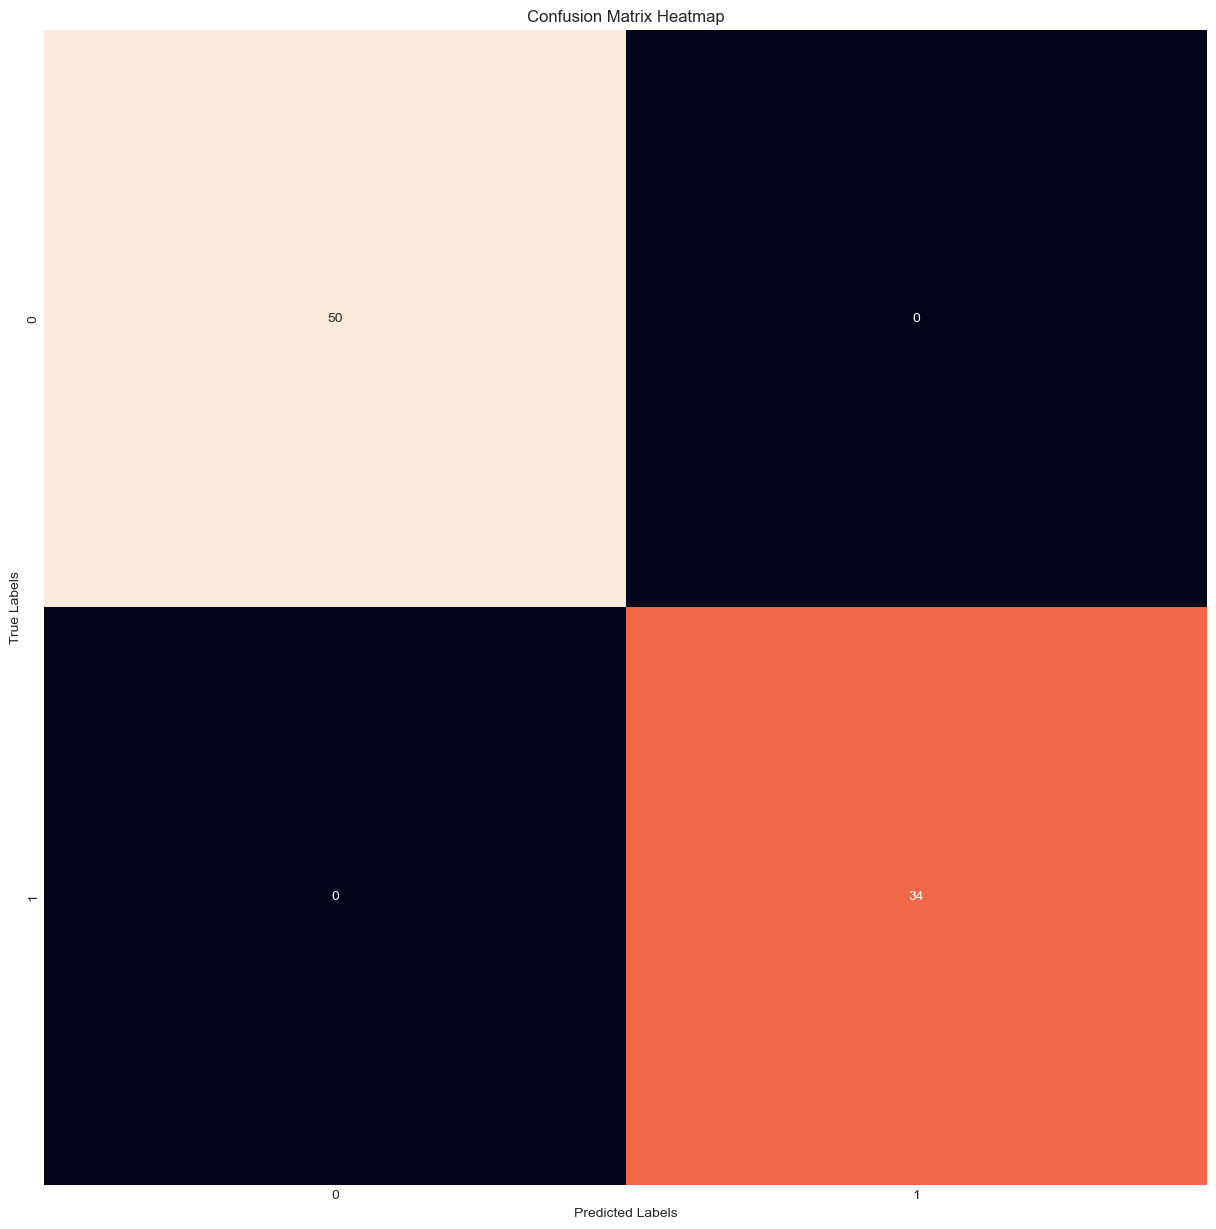

In [41]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### Conclusion:
- The Gradient Boosting, Logistic Regression, and Random Forest models all achieved perfect accuracy on both training and testing datasets, suggesting potential overfitting or perfect separation in the data.
- The Support Vector Machine (SVM) performed well but had slightly lower accuracy on the testing dataset compared to the other models.
- Given the high accuracy and consistent performance across models, further evaluation, such as cross-validation and hyperparameter tuning, may be needed to make a more informed decision.
- It's advisable to consider factors such as model complexity, interpretability, and computational efficiency when choosing the best model for deployment.

In summary, all models performed exceptionally well on this task

# Deployment 

In [42]:
# Prepare the input data for prediction
new_data = {
    'Pclass': [3, 1, 2, 3, 3],
    'Sex': ['female', 'male', 'female', 'male', 'female'],
    'Age': [22, 35, 28, 40, 25],
    'SibSp': [1, 0, 1, 0, 1],
    'Parch': [0, 1, 1, 0, 1],
    'Fare': [7.25, 71.2833, 10.5, 8.05, 22.3583],
    'Embarked': ['S', 'C', 'S', 'S', 'C']
}


In [43]:
# Preprocess the input data
new_data_df = pd.DataFrame(new_data)
new_data_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,female,22,1,0,7.2500,S
1,1,male,35,0,1,71.2833,C
2,2,female,28,1,1,10.5000,S
3,3,male,40,0,0,8.0500,S
4,3,female,25,1,1,22.3583,C


In [44]:
new_data_transformed = transformer.transform(new_data_df)

In [45]:
# Make predictions
predicted_labels = random_forest.predict(new_data_transformed)
print("Predicted Labels:", predicted_labels)

Predicted Labels: [1 0 1 0 1]


## Thank You! 😊🙌
## We appreciate your time and attention!